# King County Dataset Linear Regression Model 2

### In this model I am going to try to clean up a bit, maybe starting with 'date' and 'sqft_basement'

In [1]:
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### The following features are all right skewed with a outlier that may be keeping the data from being normal.

In [3]:
# bedrooms, sqft_living, sqft_lot, sqft_living15, sqft_lot15 

In [4]:
# Perform log transformation
logbedrooms = np.log(data["bedrooms"])
logliving = np.log(data["sqft_living"])
loglot = np.log(data["sqft_lot"])
loglivingnear = np.log(data["sqft_living15"])
loglotnear = np.log(data["sqft_lot15"])

# Switch the Standardization into the original data
data["bedrooms"] = (logbedrooms-np.mean(logbedrooms))/np.sqrt(np.var(logbedrooms))
data["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
data["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
data["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
data["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/(np.sqrt(np.var(loglotnear)))

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,-0.279725,1.00,-1.125582,-0.388439,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,-1.035453,-0.395459
1,6414100192,12/9/2014,538000.0,-0.279725,2.25,0.709463,-0.113243,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,-0.326789,-0.024288
2,5631500400,2/25/2015,180000.0,-1.711651,1.00,-2.131943,0.244481,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,1.126531,0.042037
3,2487200875,12/9/2014,604000.0,0.736243,3.00,0.070676,-0.523926,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,-0.990210,-0.545863
4,1954400510,2/18/2015,510000.0,-0.279725,2.00,-0.292732,0.008140,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,-0.134221,-0.046395


In [6]:
 # This one it's getting stuck on the "NaN's" (also got ride of 'waterfront' and 'yr_renovated')
X = data.drop(["date","sqft_basement", "view", "waterfront", "yr_renovated"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [7]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [8]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [10]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 8.72821248922188e-21
Test Mean Squarred Error: 7.611336106357565e-21


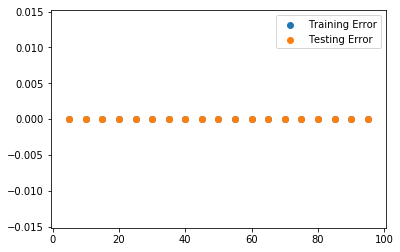

In [11]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15"
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     2126.
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:41:11   Log-Likelihood:            -2.9897e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21584   BIC:                         5.981e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.069e+07   3.59e+06     -2.976      0.003   -1.77e+07   -3.65e+06
id            -6.899e-07      6e-07     -1.150      0.250   -1.87e-06    4.86e-07
bedrooms      -5.625e+04   2266.657    -24.816      0.000   -6.07e+04   -5.18e+04
bathrooms      1.279e+05   3876.260     33.001      0.000     1.2e+05    1.36e+05
sqft_living    1.465e+05   3709.047     39.491      0.000    1.39e+05    1.54e+05
sqft_lot       1.237e+04   4438.119      2.786      0.005    3667.622    2.11e+04
floors         4.592e+04   4137.410     11.100      0.000    3.78e+04     5.4e+04
yr_built      -2965.2158     78.844    -37.609      0.000   -3119.755   -2810.677
zipcode        -543.8819     40.384    -13.468      0.000    -623.037    -464.727
lat            6.401e+05   1.31e+04     48.911      0.000    6.14e+05    6.66e+05
long          -3.243e+05   1.62e+04    -20.003      0.000   -3.56e+05   -2.93e+05
sqft_living15  7.952e+04   2706.482     29.381      0.000    7.42e+04    8.48e+04
sqft_lot15    -1532.8588   4355.553     -0.352      0.725   -1.01e+04    7004.348
==============================================================================
Omnibus:                    21240.829   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2672907.921
Skew:                           4.503   Prob(JB):                         0.00
Kurtosis:                      56.751   Cond. No.                     1.15e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-1.411136593609026e-19

## Results

R-squared is 0.542 which doesn't seem that good.  Plus the P>|t| are off on a few, such as sqft_lot15 which I thought I just worked on!